# Time Series Forecasting

## Objective
The objective of this project is to analyze the dataset, identify key patterns,
and build a machine learning model to make predictions based on historical data.

This project demonstrates an end-to-end data science workflow including
data preprocessing, modeling, and evaluation.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


In [2]:
date_range = pd.date_range(start='2018-01-01', periods=100, freq='M')
np.random.seed(42)

values = np.random.normal(loc=200, scale=20, size=len(date_range)).cumsum()

ts_data = pd.DataFrame({
    'Date': date_range,
    'Sales': values
})

ts_data.set_index('Date', inplace=True)
ts_data.head()


C:\Users\ACER\AppData\Local\Temp\ipykernel_21284\3477507959.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start='2018-01-01', periods=100, freq='M')


,Sales
Date,
2018-01-31,209.934283
2018-02-28,407.168997
2018-03-31,620.122768
2018-04-30,850.583365
2018-05-31,1045.900297


## Dataset Overview
A synthetic monthly sales dataset was created to demonstrate time series analysis and forecasting techniques.


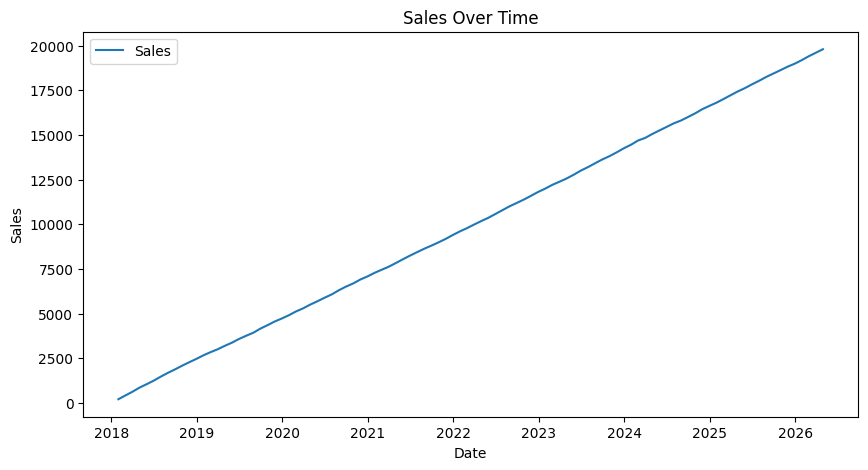

In [3]:
plt.figure(figsize=(10,5))
plt.plot(ts_data, label='Sales')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


### Time Series Visualization
The plot shows an overall upward trend with random fluctuations over time.


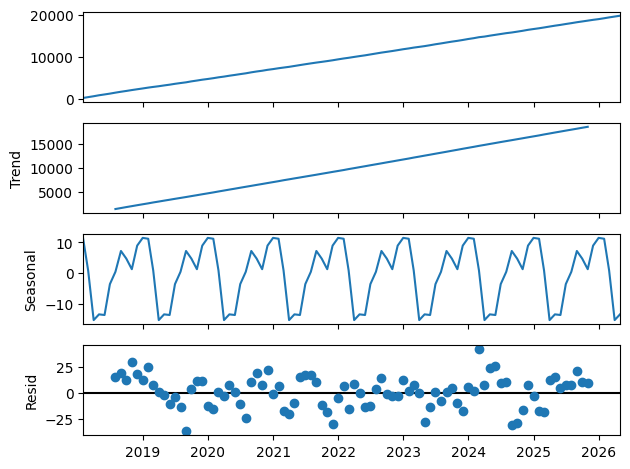

In [4]:
decomposition = seasonal_decompose(ts_data, model='additive')
decomposition.plot()
plt.show()


### Time Series Decomposition
The series was decomposed into trend, seasonality, and residual components to better understand underlying patterns.


In [5]:
train = ts_data.iloc[:-12]
test = ts_data.iloc[-12:]


### Train-Test Split
The last 12 observations were reserved for testing to simulate future forecasting.


In [6]:
moving_avg = train.rolling(window=3).mean()


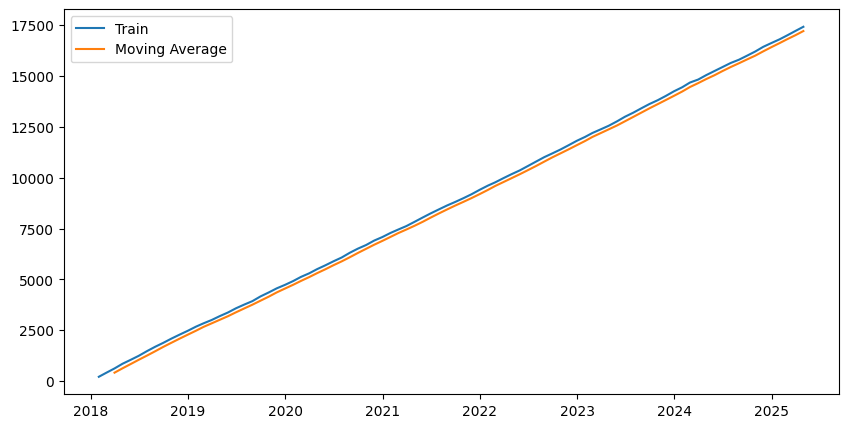

In [7]:
plt.figure(figsize=(10,5))
plt.plot(train, label='Train')
plt.plot(moving_avg, label='Moving Average')
plt.legend()
plt.show()


In [8]:
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()


c:\Users\ACER\anaconda3\envs\python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\ACER\anaconda3\envs\python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\ACER\anaconda3\envs\python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\ACER\anaconda3\envs\python\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [9]:
forecast = model_fit.forecast(steps=12)
forecast


2025-05-31    17620.327272
2025-06-30    17818.179433
2025-07-31    18016.031583
2025-08-31    18213.883723
2025-09-30    18411.735851
2025-10-31    18609.587968
2025-11-30    18807.440074
2025-12-31    19005.292169
2026-01-31    19203.144253
2026-02-28    19400.996326
2026-03-31    19598.848388
2026-04-30    19796.700438
Freq: ME, Name: predicted_mean, dtype: float64

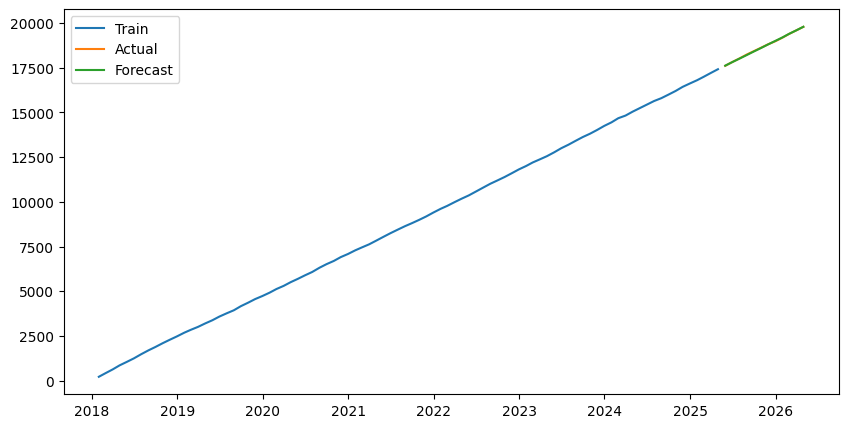

In [10]:
plt.figure(figsize=(10,5))
plt.plot(train, label='Train')
plt.plot(test, label='Actual')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()


In [11]:
rmse = np.sqrt(mean_squared_error(test, forecast))
rmse


np.float64(13.310510700308763)

### Model Evaluation
Root Mean Squared Error (RMSE) was used to evaluate forecasting accuracy.


## Final Summary
- Time series data was visualized and decomposed to identify trends and patterns.
- A baseline moving average was applied for smoothing.
- An ARIMA model was built to forecast future values.
- Forecast performance was evaluated using RMSE.

This task demonstrates a complete time series forecasting workflow.
